<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/%ED%95%B4%EC%84%A4/ch01_06_CNN%EA%B8%B0%EC%B4%88_Convolutional_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.06 CNN기초 - Convolutional Layer
---

* 날짜:
* 이름:

## 학습내용
    - CNN의 개념을 이해한다.
    - 텐서플로우를 이용해 CNN을 구성한다.
    - CNN 모델을 이용해 손글씨 이미지를 분류한다.
    - CNN의 feature map에 대해 이해한다.

## 데이터셋

* MNIST

```
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 이미지 데이터의 특징
---

<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv1.png width=550>
</p>

다층 퍼셉트론을 이용하기 위해서는 데이터 샘플 한개의 차원이 1차원이여야 합니다. 그러나 1차원으로 변환된 결과는 사람이 보기에도 이게 원래 어떤 이미지였는지 알아보기가 어렵습니다. 

위와 같은 결과는 변환 전에 가지고 있던 **공간적인 구조**(spatial structure) 정보가 유실된 상태입니다.

결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 합성곱 신경망을 사용합니다.


```
X = np.array([[1,1,1,1,1],
              [1,0,1,0,1],
              [1,1,0,0,1],
              [1,1,1,0,1],
              [1,1,1,0,1],
              [1,1,1,1,1],])
```

(6, 5)
(1, 30)


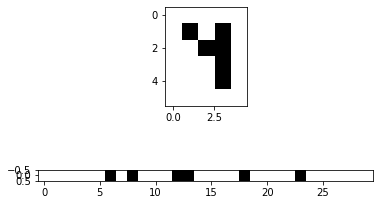

In [7]:
X = np.array([[1,1,1,1,1],
              [1,0,1,0,1],
              [1,1,0,0,1],
              [1,1,1,0,1],
              [1,1,1,0,1],
              [1,1,1,1,1],])
X_flatten = X.flatten().reshape(1,30)
print(X.shape)
print(X_flatten.shape)

plt.subplot(211);plt.imshow(X, cmap='gray')
plt.subplot(212);plt.imshow(X_flatten, cmap='gray') # (30, ) -> (1, 30)

## 합성곱 층
---

### | 텐서플로우를 이용한 합성곱층 구현

```
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    padding='valid',
    strides=(1, 1),
    activation=None,
)

```

In [9]:
from tensorflow.keras.layers import Conv2D
#from tensoflow.keras import layers

#### **filters**

* filter 개수에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-01.PNG?raw=true
 width=450>
</p>


In [15]:
x = np.random.normal(0,1, size=(1, 8, 8, 1)) # resolution = (8,8) ch=(1)
print(x.shape)
for n in [1,2,3,4]:
  y = Conv2D(filters=n, kernel_size=1)(x)
  print(f'필터 개수가 {n}일 때 아웃풋의 shape: {y.shape}')
# 필터 개수에 따라 아웃풋의 채널 (dimension)이 변화

(1, 8, 8, 1)
필터 개수가 1일 때 아웃풋의 shape: (1, 8, 8, 1)
필터 개수가 2일 때 아웃풋의 shape: (1, 8, 8, 2)
필터 개수가 3일 때 아웃풋의 shape: (1, 8, 8, 3)
필터 개수가 4일 때 아웃풋의 shape: (1, 8, 8, 4)


#### **kernel size**

* kernel size 에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-02.PNG?raw=true
 width=450>
</p>

In [19]:
x = np.random.normal(0,1, size=(1, 4, 4, 1)) # resolution = (4,4) ch=(1)
print(x.shape)
for n in [1,2,3,4]:
  y = Conv2D(filters=1, kernel_size=n)(x)
  print(f'커널 사이즈가 {n}일 때 아웃풋의 shape: {y.shape}')
# 커널 사이즈에 따라 아웃풋의 resolution이 변화 (4-n+1)

(1, 4, 4, 1)
커널 사이즈가 1일 때 아웃풋의 shape: (1, 4, 4, 1)
커널 사이즈가 2일 때 아웃풋의 shape: (1, 3, 3, 1)
커널 사이즈가 3일 때 아웃풋의 shape: (1, 2, 2, 1)
커널 사이즈가 4일 때 아웃풋의 shape: (1, 1, 1, 1)


#### **padding**

* padding 옵션에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.
  * valid
  * same

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-03.PNG?raw=true
 width=550>
</p>

In [24]:
x = np.random.normal(0,1, size=(1, 4, 4, 1)) # resolution = (4,4) ch=(1)
print(x.shape)
for n in [1,2,3,4]:
  for padding in ['valid', 'same']:
    y = Conv2D(filters=1, kernel_size=n, padding=padding)(x)
    print(f'커널 사이즈가 {n}이고, 패딩이 {padding}일 때, 아웃풋의 shape: {y.shape}')
  print('-'*60)
# padding=same이면 커널 사이즈에 따른 아웃풋 변화가 없다.
# 대게의 경우 패딩='same' -> 커널 사이즈에 따른 아웃풋 크기 고려 안함

(1, 4, 4, 1)
커널 사이즈가 1이고, 패딩이 valid일 때, 아웃풋의 shape: (1, 4, 4, 1)
커널 사이즈가 1이고, 패딩이 same일 때, 아웃풋의 shape: (1, 4, 4, 1)
------------------------------------------------------------
커널 사이즈가 2이고, 패딩이 valid일 때, 아웃풋의 shape: (1, 3, 3, 1)
커널 사이즈가 2이고, 패딩이 same일 때, 아웃풋의 shape: (1, 4, 4, 1)
------------------------------------------------------------
커널 사이즈가 3이고, 패딩이 valid일 때, 아웃풋의 shape: (1, 2, 2, 1)
커널 사이즈가 3이고, 패딩이 same일 때, 아웃풋의 shape: (1, 4, 4, 1)
------------------------------------------------------------
커널 사이즈가 4이고, 패딩이 valid일 때, 아웃풋의 shape: (1, 1, 1, 1)
커널 사이즈가 4이고, 패딩이 same일 때, 아웃풋의 shape: (1, 4, 4, 1)
------------------------------------------------------------


#### **strides**
* strides 의 크기에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-04.PNG?raw=true
 width=450>
</p>

In [25]:
x = np.random.normal(0,1, size=(1, 24, 24, 1)) # resolution = (24,24) ch=(1)
print(x.shape)
for n in [1,2,3,4,6]: # 보통 1 또는 2정도.. 크게 사용하지는 않는다.
  y = Conv2D(filters=1, kernel_size=3, padding='same', strides=n)(x)
  print(f'스트라이드가 {n}일 때 아웃풋의 shape: {y.shape}')
# 스트라이드에 따라 아웃풋의 resolution이 변화 (resolution/n)

(1, 24, 24, 1)
스트라이드가 1일 때 아웃풋의 shape: (1, 24, 24, 1)
스트라이드가 2일 때 아웃풋의 shape: (1, 12, 12, 1)
스트라이드가 3일 때 아웃풋의 shape: (1, 8, 8, 1)
스트라이드가 4일 때 아웃풋의 shape: (1, 6, 6, 1)
스트라이드가 6일 때 아웃풋의 shape: (1, 4, 4, 1)


## CNN 실습: MNIST 손글씨 이미지 분류
---

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

### **| CNN 모델을 이용한 분류**

####  **데이터 준비**

In [30]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


#### **모델 구성**
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-05_2.PNG?raw=true
 width=650>
</p>

In [32]:
from tensorflow.keras import models, layers, utils

def build_model():
  x = layers.Input(shape=(28,28,1)) 
  # * 모든 conv 레이어의 padding='same'
  # conv
  # conv
  # conv
  # flatten
  # dense
  model = models.Model(x, y)
  return model

#### **학습 및 평가**

In [34]:
model = build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 conv2d_67 (Conv2D)          (None, 14, 14, 8)         584       
                                                                 
 conv2d_68 (Conv2D)          (None, 7, 7, 3)           219       
                                                                 
 flatten_1 (Flatten)         (None, 147)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1480      
                                                                 
Total params: 2,363
Trainable params: 2,363
Non-trainable p

### **| Feature map**

#### **feature map 얻기**

#### **시각화**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-05_2.PNG?raw=true
 width=650>
</p>

[시각화 함수 스크립트](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/scripts/featuremap_dict.py)